# 01 Import

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yaml

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# pd.set_option('display.max_rows', None)

sns.set_style("darkgrid")

from IPython.display import display, Markdown
from pprint import pprint 

DEBUG = True
SEED = 666

In [3]:
DATASET = "train.csv"

import os, sys
COLAB = 'google.colab' in sys.modules
ROOT = "./"

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)


def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Import Data

In [4]:
df = pd.read_csv("orig/" + DATASET)
print(df.shape)
df.head()

(210000, 165)


,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,Target
0,0.577321,0,-1.528407,0.574591,-0.371609,x005_000,0.769142,1,x008_000,-0.564334,-1.670166,x011_001,0.306430,0.430979,0.331989,0.560323,x016_048,1.064115,x018_000,2.123352,0.331989,3,0.822184,-1.670166,-1.636594,0.342279,-1.105716,0.925453,0.790756,-3.026960,33,-1.315302,0.696806,-0.371609,x034_009,x035_014,-1.105716,-0.986619,0.946460,0.925453,4,0.296706,0,0.553993,x044_003,2.884178,x046_005,0,2.123352,1.721216,-1.509301,-0.050747,-2.072471,x053_001,0.812313,4.148009,0.948791,1.0,0.371670,1.064115,0.646152,0.907293,x062_004,0,-1.038661,0.368816,-2.072471,2.422425,1,0.371670,0,x071_234,x072_000,x073_019,x074_000,5,-0.036157,0.815055,0.184478,3,0.548773,0.674836,x082_000,0.315166,-0.842786,-2.302796,-0.099039,0.682440,3,1.324490,2.017993,1.324490,x092_001,0.553993,-0.254312,-4.850562,0.077470,x097_004,-0.242058,0.616705,0.577321,1,-3.975136,0.187446,0.368816,0.961387,x106_009,x107_006,2.024803,x109_001,x110_062,x111_000,0.790756,0.436108,-2.839741,1.752665,0.882500,0.749183,-0.289017,0.187446,2.024803,0.0,0.738336,0,x124_042,x125_002,x126_001,0.696806,1.721216,x129_023,0.577970,-2.237272,x132_039,1,x134_000,2.648660,-1.322781,x137_001,1,0.856375,0.674836,0.646152,-3.975136,-1.685895,0.856375,2.884178,-0.842786,-0.050747,-0.099039,-4.850562,x150_001,-1.038661,69,0.749183,0.342279,-1.509301,2.422425,x157_003,33,0.702792,0.548773,0.701321,-0.444765,x163_010,Class_2
1,0.413242,0,-0.072692,0.567419,0.206837,x005_000,-0.164559,0,x008_000,-0.956555,4.030491,x011_001,0.279233,0.512899,0.771122,0.183065,x016_048,1.282373,x018_000,-2.110657,0.771122,3,0.281779,4.030491,4.146307,0.393220,4.386999,0.528352,0.255444,2.837810,33,-7.434869,0.703253,0.206837,x034_012,x035_010,4.386999,-4.222262,0.347965,0.528352,5,-0.985570,0,0.354723,x044_003,2.755122,x046_027,8,-2.110657,4.238453,-0.097172,7.098692,0.803323,x053_001,0.475270,-5.056917,0.328198,1.0,0.423728,1.282373,0.255066,0.493516,x062_009,0,-5.380026,0.636534,0.803323,2.666922,1,0.423728,0,x071_014,x072_000,x073_002,x074_000,5,3.308104,0.359323,0.555923,2,1.914999,0.275613,x082_000,0.639203,-0.820514,-3.699545,1.796063,0.795767,3,0.325121,-1.564933,0.325121,x092_001,0.354723,-0.752444,-3.079449,1.073057,x097_002,-1.637676,0.547283,0.413242,0,0.041940,0.495975,0.636534,0.283092,x106_010,x107_012,-1.353885,x109_000,x110_057,x111_000,0.255444,0.367446,-0.256603,-0.603172,0.317201,0.908436,0.347056,0.495975,-1.353885,0.0,0.250319,10,x124_141,x125_002,x126_000,0.703253,4.238453,x129_045,0.365215,2.986686,x132_025,1,x134_000,-3.908599,-0.592003,x137_001,1,-0.575467,0.275613,0.255066,0.041940,-3.751033,-0.575467,2.755122,-0.820514,7.098692,1.796063,-3.079449,x150_001,-5.380026,54,0.908436,0.393220,-0.097172,2.666922,x157_042,33,0.661232,1.914999,0.934367,0.524791,x163_005,Class_2
2,-0.992723,0,5.089105,0.344148,1.052436,x005_000,-1.066716,0,x008_000,-0.852081,-5.396598,x011_000,0.349402,0.541646,1.252255,1.696027,x016_048,2.988087,x018_003,-3.721994,1.252255,1,0.298688,-5.396598,0.240343,0.701801,-3.333315,0.331816,0.372463,1.002680,33,-7.104154,0.607222,1.052436,x034_010,x035_014,-3.333315,-4.765734,0.369349,0.331816,7,-2.538480,0,0.680543,x044_003,-0.756906,x046_025,0,-3.721994,1.9

In [5]:
target = 'Target'
features = df.columns.drop(target)

In [6]:
df = df.dropna(subset=[target])

<Axes: ylabel='Target'>

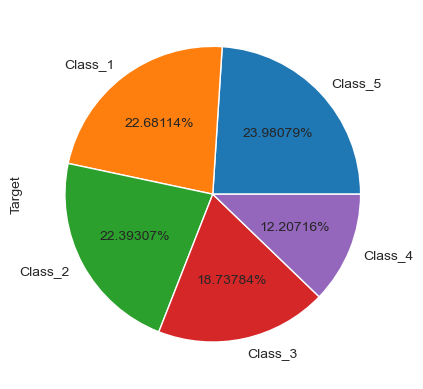

In [7]:
df.Target.value_counts(normalize=True, dropna=False).plot(kind='pie', autopct='%1.5f%%')

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=SEED, stratify=df[target])

print(df_train.shape, df_test.shape)

(125803, 165) (83869, 165)


In [9]:
df_train.to_pickle(ROOT + "data/train.pkl")
df_test.to_pickle(ROOT + "data/test.pkl")

In [10]:
df_score = pd.read_csv("orig/test.csv")
df_score.to_pickle(ROOT + "data/score.pkl")

## Comments

* Target had NA - dropped the rows
* Features has NA - not touched yet
* datatypes are not correct - need to be fixed